In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

sns.set(style='darkgrid', palette='muted', font_scale=1.5, rc={'figure.figsize':(20,10)})

RANDOM_SEED = 40
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
def open_results():
    with open('./fitted_data/fitted_df_new.pkl', 'rb') as f:
        return pickle.load(f)

In [1]:
import glob
import pickle
def open_param_results():
    files = glob.glob('./*.pkl')
    
    all_models = []
    for file in files:
        with open(file, 'rb') as f:
            [all_models.append(df) for df in pickle.load(f)] 
    return all_models

In [2]:
param_df = open_param_results()
print(len(param_df))

960


In [3]:
fitted_dfs = open_results()

In [4]:
def show_results(df_list, rows=3):
    best_df = np.array(sorted(df_list, key=lambda df: df['score']['r2'], reverse=True)[:rows * 3]).reshape(rows, 3)

    fig_1, ax_1 = plt.subplots(rows, best_df.shape[1], figsize=(25, rows * 5))
    fig_1.suptitle('Loss / Val_loss', size=30)

    for i, row in enumerate(ax_1):
        for j, col in enumerate(row):
            col.set_title(f'R2: {best_df[i][j]["score"]["r2"]:0.4f} RMSE: {best_df[i][j]["score"]["RMSE"]:0.2f} MAE: {best_df[i][j]["score"]["MAE"]:0.2f}', size=15)
            col.plot(best_df[i][j]['history']['loss'], label='train')
            col.plot(best_df[i][j]['history']['val_loss'], label='validation')
            col.legend(loc="upper right", prop={'size': 12})
            col.tick_params(labelsize=12)
    
    fig_2, ax_2 = plt.subplots(best_df.shape[0], best_df.shape[1], figsize=(25, rows * 5))
    fig_2.suptitle('1 week predictions', size=30)

    for i, row in enumerate(ax_2):
        for j, col in enumerate(row):
            col.set_title(f'R2: {best_df[i][j]["score"]["r2"]:0.4f} RMSE: {best_df[i][j]["score"]["RMSE"]:0.2f} MAE: {best_df[i][j]["score"]["MAE"]:0.2f}', size=15)
            col.plot(best_df[i][j]['y_test'], label='true', marker=".")
            col.plot(best_df[i][j]['predictions'], label='predicted', marker=".")
            col.legend(loc="upper right", prop={'size': 12})
            col.tick_params(labelsize=12)

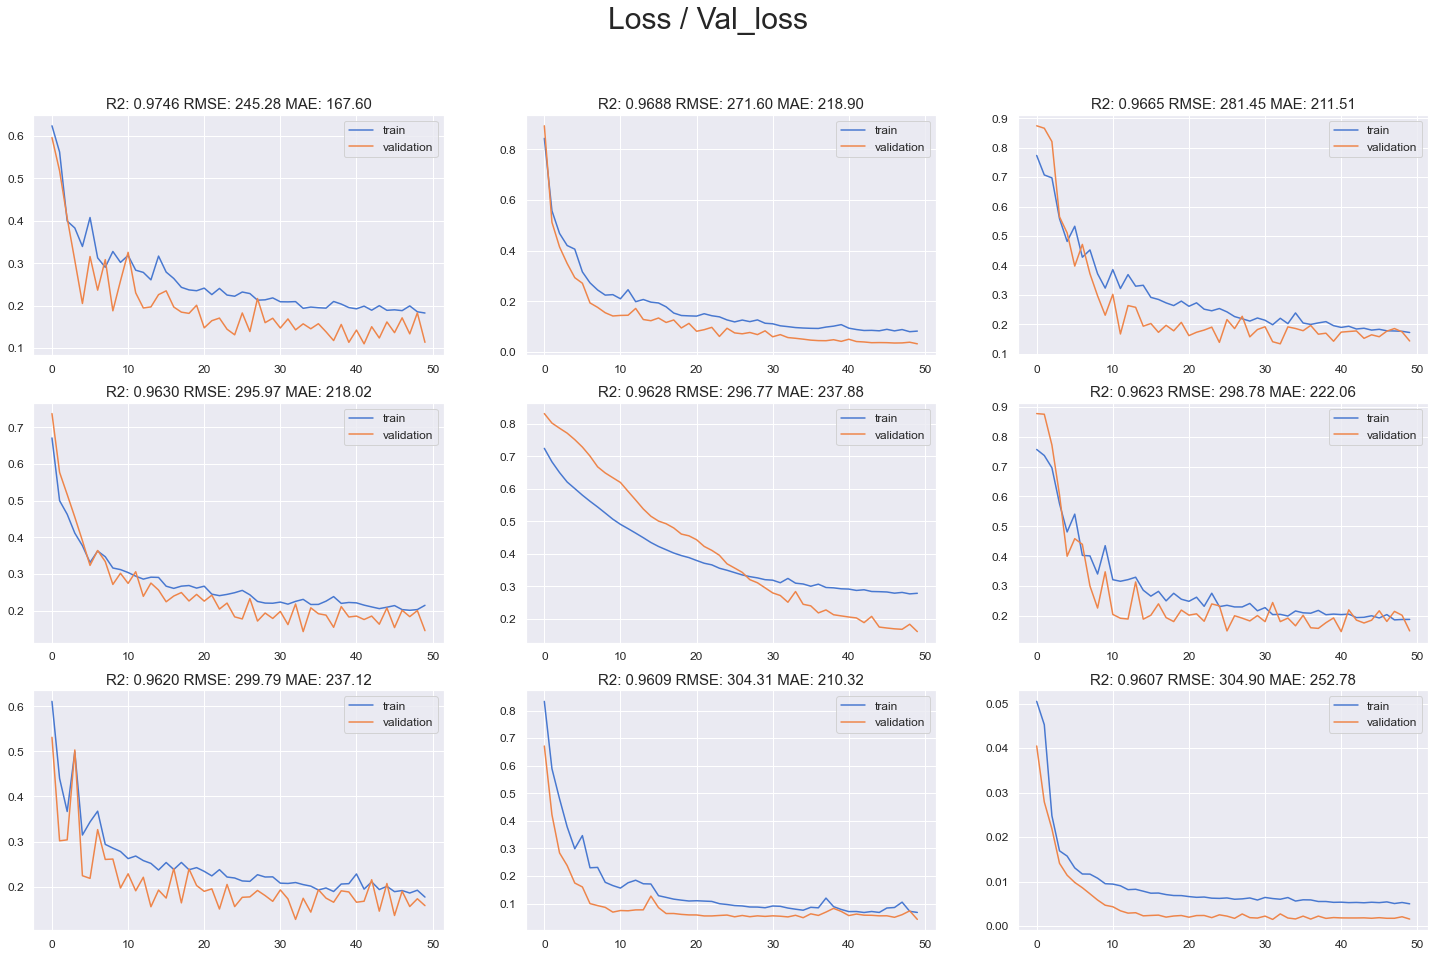

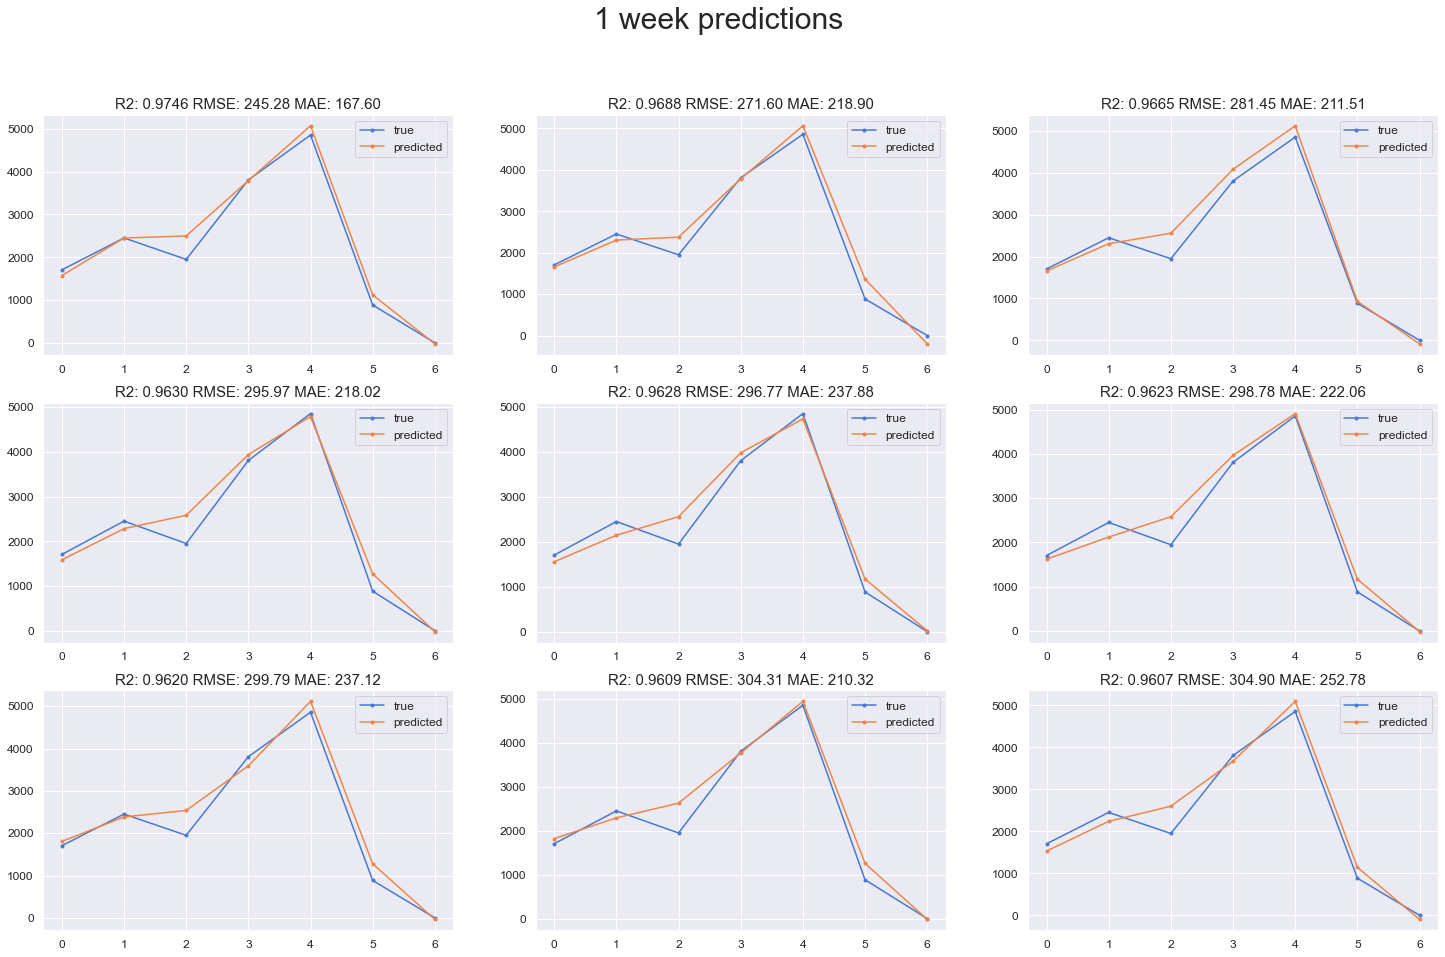

In [7]:
show_results(param_df, 3)

In [16]:
# def get_scores(df_list, amount):
#     print("\n".join(f'{df["score"]}' for df in list(sorted(df_list, key=lambda df: df['score']['r2'], reverse=True))[:amount]))
def get_scores(df_list, amount):
    print("\n".join(f'{df["score"]}, \n {df["hyper_params"]}, \n {df["features"]}, \n {df["time_steps"]}' for df in list(sorted(df_list, key=lambda df: df['score']['r2'], reverse=True))[:amount]))

In [12]:
def get_config(df_list, amount):
    print("\n".join(f'{df["hyper_params"]}' for df in list(sorted(df_list, key=lambda df: df['score']['r2'], reverse=True))[:amount]))

In [20]:
get_config(param_df, 5)

{'epochs': 50, 'merge_mode': 'sum', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002872E486370>, 'loss': 'mae', 'batch_size': 32, 'activation_function': 'sigmoid'}
{'epochs': 50, 'merge_mode': 'concat', 'units': 64, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000028751540040>, 'loss': 'mse', 'batch_size': 32, 'activation_function': 'softmax'}
{'epochs': 50, 'merge_mode': 'mul', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002872E486370>, 'loss': 'mae', 'batch_size': 32, 'activation_function': 'softmax'}
{'epochs': 50, 'merge_mode': 'sum', 'units': 64, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000028751540040>, 'loss': 'mae', 'batch_size': 32, 'activation_function': 'sigmoid'}
{'epochs': 50, 'merge_mode': 'ave', 'units': 64, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000287AF450B80>, 'loss': 'mae', 'batch_

In [19]:
get_scores(param_df, 5)

{'RMSE': 245.279367053525, 'MAE': 167.59788812909693, 'r2': 0.97458710808944}, 
 {'epochs': 50, 'merge_mode': 'sum', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002872E486370>, 'loss': 'mae', 'batch_size': 32, 'activation_function': 'sigmoid'}, 
 Index(['artiklar', 'weekday', 'day_of_month', 'before_holiday'], dtype='object'), 
 14
{'RMSE': 271.60273905646915, 'MAE': 218.90482003348103, 'r2': 0.968839792111804}, 
 {'epochs': 50, 'merge_mode': 'concat', 'units': 64, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000028751540040>, 'loss': 'mse', 'batch_size': 32, 'activation_function': 'softmax'}, 
 Index(['artiklar', 'weekday', 'before_holiday'], dtype='object'), 
 14
{'RMSE': 281.4474314635269, 'MAE': 211.5134244646344, 'r2': 0.9665399462104594}, 
 {'epochs': 50, 'merge_mode': 'mul', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002872E486370>, 'loss': 'mae', 'batch_size

In [11]:
def get_top(df_list, num):
    return sorted(df_list, key=lambda df: df['score']['r2'], reverse=True)[:num]

In [9]:
top_dfs = get_top(fitted_dfs, 50)

In [10]:
import pickle
def save_results(df_list, name):
    with open(f'model_{name}.pkl', 'wb') as f:
        pickle.dump(df_list, f)

## **Hyperparameter**  

* **Epochs**
* **Merge_mode** (Biderectional specific)
* **Layers**
* **Units / Neurons**
* **Optimizer**
    * **Loss**
    * **Learning_rate**
* **Batch_size**
* **activation functions**

In [11]:
def hyper_param_test(df_list):
    epochs = [50]
    merge_modes = ['sum', 'mul', 'ave', 'concat']
    units = [128, 64]
    optimizers = [Adam(learning_rate=0.001), Adam(learning_rate=0.0001)]
    losses = ['mse', 'mae']
    batch_sizes = [32]
    activation_functions = ['relu', 'sigmoid', 'softmax']
    
    for i, df in enumerate(df_list, 7):
        loop_index = 1
        hyper_param_df = []
        
        for epoch in epochs:
            for merge_mode in merge_modes:
                for unit in units:
                    for optimizer in optimizers:
                        for loss in losses:
                            for batch_size in batch_sizes:
                                for activation_function in activation_functions:
                                    model = Sequential()
                                    model.add(Bidirectional(
                                              LSTM(units=unit, input_shape=(df['X_train'].shape[1], df['X_train'].shape[2])),
                                              merge_mode=merge_mode))
                                    model.add(Dense(units=1))
                                    model.compile(loss=loss, optimizer=optimizer)

                                    print(f'Training Model {i}/{len(df_list)}'.center(50, '-'))
                                    print(f'Hyper_param_test {loop_index} / {sum([len(epochs) * len(merge_modes) * len(units) * len(optimizers) * len(losses) * len(batch_sizes) * len(activation_functions)])}')
                                    
                                    history = model.fit(
                                    df['X_train'], df['y_train'],
                                    epochs=epoch,
                                    batch_size=batch_size,
                                    validation_data=(df['X_test'], df['scaler_y'].transform(df['y_test'])),
                                    shuffle=False,
                                    verbose=0
                                    )

                                    df['history'] = {'loss': history.history['loss'], 'val_loss': history.history['val_loss']}

                                    predictions = model.predict(df['X_test'])
                                    
                                    if df['scaler_y']:
                                        df['predictions'] = df['scaler_y'].inverse_transform(predictions)
                                    else:
                                        df['predictions'] = predictions

                                    df['score'] = {'RMSE': np.sqrt(mean_squared_error(y_true=df['y_test'], y_pred=df['predictions'])),
                                                   'MAE': mean_absolute_error(y_true=df['y_test'], y_pred=df['predictions']),
                                                   'r2': r2_score(y_true=df['y_test'], y_pred=df['predictions'])}
                                    
                                    hyper_param_dict = {
                                        'hyper_params': {
                                            'epochs': epoch,
                                            'merge_mode': merge_mode,
                                            'units': unit,
                                            'optimizer': optimizer,
                                            'loss': loss,
                                            'batch_size': batch_size,
                                            'activation_function': activation_function
                                        },
                                    }
                                    
                                    new_df = {**df.copy(), **hyper_param_dict}
                                    
                                    hyper_param_df.append(new_df)
                                    
                                    loop_index += 1
                        
        save_results(hyper_param_df, i)

In [12]:
hyper_param_test(top_dfs[6:10])

----------------Training Model 7/4----------------
Hyper_param_test 1 / 96
----------------Training Model 7/4----------------
Hyper_param_test 2 / 96
----------------Training Model 7/4----------------
Hyper_param_test 3 / 96
----------------Training Model 7/4----------------
Hyper_param_test 4 / 96
----------------Training Model 7/4----------------
Hyper_param_test 5 / 96
----------------Training Model 7/4----------------
Hyper_param_test 6 / 96
----------------Training Model 7/4----------------
Hyper_param_test 7 / 96
----------------Training Model 7/4----------------
Hyper_param_test 8 / 96
----------------Training Model 7/4----------------
Hyper_param_test 9 / 96
----------------Training Model 7/4----------------
Hyper_param_test 10 / 96
----------------Training Model 7/4----------------
Hyper_param_test 11 / 96
----------------Training Model 7/4----------------
Hyper_param_test 12 / 96
----------------Training Model 7/4----------------
Hyper_param_test 13 / 96
----------------Train

In [13]:
def open_results():
    with open('model_1', 'rb') as f:
        return pickle.load(f)

In [14]:
test = open_results()

In [15]:
for df in test:
    print(df['score'], df['hyper_params'])

{'RMSE': 353.82897292270036, 'MAE': 263.299333844865, 'r2': 0.9471166645348246} {'epochs': 50, 'merge_mode': 'sum', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000203FC9176A0>, 'loss': 'mse', 'batch_size': 32, 'activation_function': 'relu'}
{'RMSE': 408.6176134904509, 'MAE': 332.7822091238839, 'r2': 0.9294712443420446} {'epochs': 50, 'merge_mode': 'sum', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000203FC9176A0>, 'loss': 'mse', 'batch_size': 32, 'activation_function': 'sigmoid'}
{'RMSE': 524.6627039813858, 'MAE': 406.2254115513393, 'r2': 0.8837233684778113} {'epochs': 50, 'merge_mode': 'sum', 'units': 128, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000203FC9176A0>, 'loss': 'mse', 'batch_size': 32, 'activation_function': 'softmax'}
{'RMSE': 455.8833701184742, 'MAE': 361.43640136718744, 'r2': 0.9122111103906185} {'epochs': 50, 'merge_mode': 'sum', 'units': 128, 'opti